In [70]:
import numpy as np
import scipy as sp
from scipy import linalg as la
from matplotlib import pyplot as plt

In [7]:
def householderQR (A):
    A = np.array(A)
    m, n = A.shape
    R = np.copy(A)
    Q = np.identity(m)
    sign = lambda x: 1 if x >= 0 else -1
    for k in range(n):
        u = np.copy(R[k:, k])
        u[0] = u[0] + sign(u[0])*la.norm(u)
        u  = u*(1/la.norm(u))
        R[k:, k:] = R[k:, k:] - 2*np.outer(u, np.dot(u, R[k:, k:]))
        Q[k:, :] = Q[k:, :] - 2*np.outer(u, np.dot(u, Q[k:, :]))
        
    return np.transpose(Q), R

def LS_sol(A, b):
    A = np.array(A)
    b = np.array(b)
    m, n = A.shape
    Q, R = householderQR(A)
    y = np.transpose(Q)@b
    x_hat = np.zeros((n,1))
    for i in np.arange(n)[::-1]:
        x_hat[i] = (1/R[i, i])*(y[i] - np.transpose(x_hat)@R[i, :])
    return x_hat

A = [[1, 2], [4, 5], [8, 13], [9, 11]]
b = np.transpose([1,2,3,4])
LS_sol(A, b)


array([[ 0.18496503],
       [ 0.18601399]])

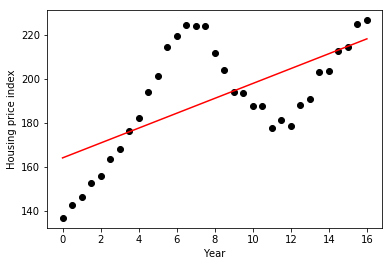

In [28]:
#problem 2
# readin the data
housing = np.load("housing.npy")
A = np.column_stack((housing[:, 0], np.ones_like(housing[:, 0])))
b = housing[:, 1]
A_housing, b_housing = LS_sol(A, b)

#plotting
housing_fig = plt.figure()
x = np.linspace(0, 16, 200)
y = A_housing*x + b_housing
plt.plot(housing[:, 0], housing[:, 1], "ko")
plt.plot(x, y, "r-")
plt.xlabel("Year")
plt.ylabel("Housing price index")
plt.show()


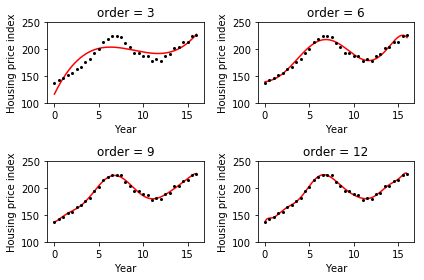

In [83]:
#problem 3
#create the vander matrix first
housing_fig_poly = plt.figure()
x = np.linspace(0, 16, 1000)
for i in range(4):
    order = 3 + 3*i
    vander = np.vander(housing[:, 0], (order + 1))
    b = housing[:, 1]
    coeff = np.reshape(LS_sol(vander, b),(order + 1))
    f = np.poly1d(coeff)
    y = f(x)
    plt.subplot(2, 2, (i+1))
    plt.plot(x, y, "r-")
    plt.plot(housing[:, 0], housing[:, 1], "ko", ms = 2)
    plt.title("order = "+str(order))
    plt.ylim(100, 250)
    plt.xlabel("Year")
    plt.ylabel("Housing price index")
    plt.tight_layout()

plt.show()



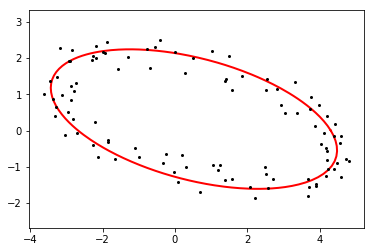

In [100]:
#problem 4
#readin the data
ellipse = np.load("ellipse.npy")
A = np.column_stack((ellipse[:, 0]**2, ellipse[:, 0], ellipse[:, 0]*ellipse[:, 1], ellipse[:, 1], ellipse[:, 1]**2))
b = np.ones_like(ellipse[:,0])
coeff = np.reshape(LS_sol(A, b), 5)
def plot_ellipse(a, b, c, d, e):

    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t,"r-" ,lw=2)
    plt.gca().set_aspect("equal", "datalim")
plot_ellipse(coeff[0],coeff[1],coeff[2],coeff[3],coeff[4] )
plt.plot(ellipse[:, 0], ellipse[:, 1], "ko", ms = 2)
plt.show()
